# Tensorflow Ex-7 Part-3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
x_data = np.linspace(0.0,10.0,1000000)

In [3]:
noise = np.random.randn(len(x_data))

In [4]:
x_data
noise

array([ 1.16781119,  1.84240732, -0.53466813, ...,  0.55090555,
       -0.97628755,  0.30449474])

In [5]:
#y = mx + b, b = 5
y_true = (0.5 * x_data) + 5 + noise

In [6]:
x_df = pd.DataFrame(data = x_data, columns=['X_Data'])

In [7]:
y_df = pd.DataFrame(data = y_true, columns=['Y'])

In [8]:
x_df.head()
y_df.head()

Y
0  6.167811
1  6.842412
2  4.465342
3  4.121623
4  5.294023

In [9]:
my_data = pd.concat([x_df,y_df],axis=1)

In [10]:
my_data.head()

X_Data         Y
0  0.00000  6.167811
1  0.00001  6.842412
2  0.00002  4.465342
3  0.00003  4.121623
4  0.00004  5.294023

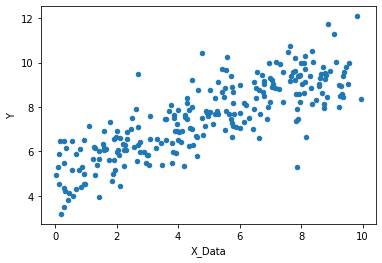

In [11]:
my_data.sample(n=250).plot(kind = 'scatter',x='X_Data', y = 'Y')

In [12]:
batch_size = 8

In [13]:
m = tf.Variable(0.5)
b = tf.Variable(1.0)

In [14]:
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

In [15]:
#model
y_model = m*xph + b

In [16]:
#Cost Funtion
error = tf.reduce_sum(tf.square(yph-y_model))

In [17]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [18]:
init = tf.global_variables_initializer()

In [19]:
with tf.Session() as sess:
    sess.run(init)
    
    batches = 10000
    
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        feed = {xph:x_data[rand_ind], yph:y_true[rand_ind]}
        sess.run(train,feed_dict = feed)
    model_m, model_b = sess.run([m,b])

In [20]:
model_m

0.49284545

In [21]:
model_b

4.994752

In [22]:
y_hat = x_data * model_m + model_b

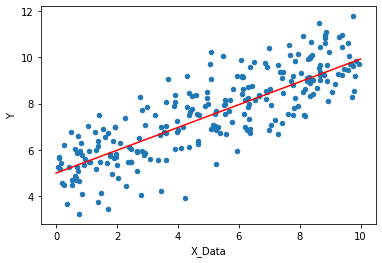

In [23]:
my_data.sample(n=250).plot(kind = 'scatter',x='X_Data', y = 'Y')
plt.plot(x_data,y_hat,'r')

In [24]:
#Estimator API
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

In [25]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpxbfzlav3', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [26]:
# Train Test split
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data, y_true, test_size=0.3, random_state=0)

In [28]:
x_train.shape
x_eval.shape

(300000,)

In [29]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=None, shuffle=True)

In [30]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=1000, shuffle=False)

In [31]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=1000, shuffle=False)

In [32]:
estimator.train(input_fn=input_func,steps=1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Please use `layer.add_weight` method instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpxbfzlav3/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving c